# 텍스트 데이터를 이용한 임베딩

In [1]:
import pandas as pd 
import numpy as np

clean_data = pd.read_csv('./twitter-airline-sentiment.csv')
clean_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## 1. TF-IDF

HW2에서 살펴본 방법 모두에서 텍스트의 모든 단어가 동등하게 중요하게 처리됩니다. 문서에서 일부 단어가 다른 단어보다 더 중요하다는 개념이 없습니다. TF-IDF(Term Frequency-Inverse Document Frequency)는 이 문제에 대한 대응책입니다. 이 방법은 주어진 단어의 중요성을 문서 내 다른 단어 및 말뭉치(corpus) 내 다른 문서와의 상대적인 중요성으로 계산하려고 합니다.

TF-IDF의 직관은 다음과 같습니다. 단어 w가 문장 S1에서 많이 나타나지만 말뭉치 내 다른 문장 Sn에서는 거의 나타나지 않으면, 단어 w는 문장 S1에 매우 중요하다고 할 수 있습니다. w의 중요성은 S1에서의 빈도수(해당 단어가 문장 S1에서 얼마나 자주 나타나는지)에 비례하여 증가해야 하지만, 동시에 말뭉치 내 다른 문장 Sn에서의 빈도수에 반비례하여 감소해야 합니다. **이를 수학적으로 표현하면 두 가지 양을 사용합니다: TF와 IDF입니다. 두 값은 곱하여 TF-IDF 점수를 도출합니다.**

**TF(Term Frequency)는 주어진 문서에서 용어나 단어가 얼마나 자주 나타나는지 측정합니다.**

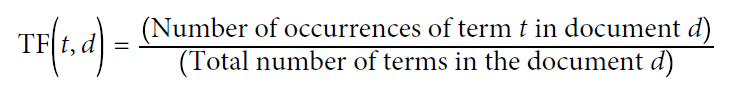

**IDF(inverse document frequency)** 는 말뭉치(corpus) 전체에서 용어의 중요성을 측정합니다. TF를 계산할 때, 모든 용어에 동일한 중요도(가중치)가 부여됩니다. 그러나 is, are, am 등과 같은 불용어(stop words)는 빈번히 나타나지만 중요하지 않다는 것이 잘 알려져 있습니다. 이러한 경우를 고려하기 위해 IDF는 말뭉치 내에서 매우 일반적인 용어를 가중치를 낮추고 드물게 나타나는 용어를 가중치를 높이도록 합니다. 용어 t의 IDF는 다음과 같이 계산됩니다.

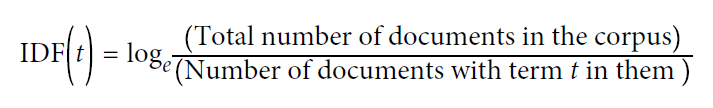

TF-IDF 점수는 이 두 용어의 곱으로 얻어집니다. 따라서, TF-IDF 점수 = TF * IDF 입니다. 예를 들어보겠습니다.

문장 A = The Car is Driven on the Road

문장 B = The Truck is Driven on the highway

TF-IDF 점수의 계산 결과는 아래와 같습니다.

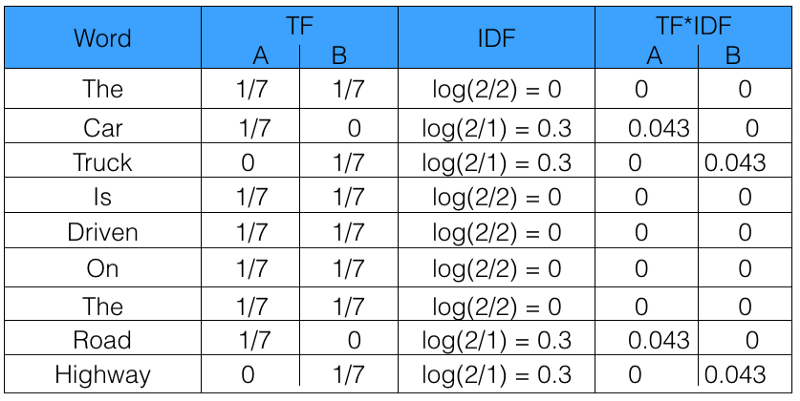



In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer# 아래 sample_corpus를 tfidf를 이용해 실행해보아라.

tfidf = TfidfVectorizer()
sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tfidf_rep = tfidf.fit_transform(sample_corpus)

print(f"IDF Values for sample corpus : {tfidf.idf_}")
print("TF-IDF Representation for sentence 'the cat sat in the hat' :") 
print(tfidf.transform(["the cat sat in the hat"]).toarray())

# 이번에는 sample_corpus 대신에 'twitter-airline-sentiment.csv'를 tfidf를 이용해 실행해보아라.
# HW2의 preprocess 함수를 이용하면 된다.

"""
write your code here

tfidf = TfidfVectorizer()
twitter_corpus = []
tfidf_rep = tfidf.fit_transform(twitter_corpus)

"""
def preprocess_text(sentence):
  
    # 토큰화
    tokenizer = RegexpTokenizer(r'\w+') # 정규표현식을 이용한 토큰화 객체를 생성합니다.알파벳과 숫자를 제외한 모든 문자를 제거하여 단어만 남기는 역할
    tokens = tokenizer.tokenize(sentence) # 문장을 토큰화합니다.

    # 소문자 변환
    tokens = [token.lower() for token in tokens] # 문장을 소문자로 변환합니다.
    
    # 형태소 분석 및 어간 추출
    stemmer = SnowballStemmer('english') # 영어 어간 추출을 위한 SnowballStemmer 객체를 생성합니다.
    tokens = [stemmer.stem(word) for word in tokens] # 각 단어를 어간으로 추출하고 다시 문장을 만듭니다.
        
    # 불용어 처리
    stop_words = set(stopwords.words('english')) # 영어 불용어를 가져와 set 자료형으로 만듭니다.
    tokens = [word for word in tokens if word not in stop_words] # 불용어가 아닌 단어들만 골라서 다시 문장을 만듭니다.

    return tokens # 전처리된 토큰들을 반환합니다.

tfidf = TfidfVectorizer()
preprocess_token=[preprocess_text(i) for i in clean_data['text'].to_list()]
twitter_corpus = []
for i in preprocess_token:
    twitter_corpus.append(" ".join(i))
tfidf_rep = tfidf.fit_transform(twitter_corpus)

print("\nTF-IDF with 'twitter-airline-sentiment.csv'")
print(f"IDF Values for sample corpus : {tfidf.idf_}")
print("TF-IDF Representation for sentence 'virginamerica done need receipt asap could pleas help 150219 000114':") 
print(tfidf.transform(['virginamerica done need receipt asap could pleas help 150219 000114']).toarray())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hun98\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IDF Values for sample corpus : [1.         1.28768207 1.69314718 1.28768207 1.         1.69314718]
TF-IDF Representation for sentence 'the cat sat in the hat' :
[[0.29903422 0.385061   0.50630894 0.385061   0.59806843 0.        ]]

TF-IDF with 'twitter-airline-sentiment.csv'
IDF Values for sample corpus : [7.88353089 7.15759389 9.89843391 ... 9.89843391 9.89843391 9.89843391]
TF-IDF Representation for sentence 'virginamerica done need receipt asap could pleas help 150219 000114':
[[0.         0.         0.48107118 ... 0.         0.         0.        ]]


## 1.1 Bag-of-Words의 장점과 단점
### Your response:
### Bag-of-Words 기법과 TF-IDF 기법의 가장 큰 차이점은 무엇인가?
-  BOW는 각 문서의 내용을 단순히 단어 출현 빈도만으로 표현하는 반면, TF-IDF는 각 문서에서의 단어 빈도를 문서 집합 전체에서 해당 단어의 중요성을 고려하여 가중치를 부여하여 표현합니다.

- BOW와 TF-IDF의 또 다른 차이점은, BOW는 모든 단어가 동등하게 중요하다고 가정하고 수치화하는 반면, TF-IDF는 희귀한 단어일수록 높은 가중치를 부여합니다.

### TF-IDF 기법의 장점과 단점은 무엇인가?
- 특정 단어가 얼마나 다른 문서들에서도 자주 등장했는지를 고려하여 문서에서 흔하게 등장하는 단어들이 중요도가 낮다는 것을 고려할 수 있다는 점입니다. 이를 통해, 문서에서 실제로 중요한 단어들을 강조하여 분석할 수 있습니다. 

- TF-IDF는 단순한 단어 빈도수 기반 방법보다 더 다양한 방법으로 단어의 중요도를 계산할 수 있다는 장점이 있습니다.


## 2. Word2vec Word Embeddings

워드 임베딩: 단어의 실수 값 벡터 표현으로, 의미가 유사한 단어가 비슷한 표현을 가지도록 하는 것입니다. 따라서, 워드 임베딩은 단어의 의미를 실수 값 벡터로 투영하는 것입니다.

Word2vec (Word2vec)은 2013년에 발표된 워드 임베딩 기술입니다. Word2vec 알고리즘은 대량의 텍스트 말뭉치에서 단어 연관성을 학습하는 데 인공 신경망 모델을 사용합니다.

Word2vec 비슷한 의미를 가지는 단어가 서로 군집을 이루며, 의미가 매우 다른 단어들은 멀리 떨어져 있는 벡터 공간에서 단어 의미를 투영하여 나타냅니다.

In [3]:
#gensim은 pip install gensim을 명령프롬프트에 실행하면 설치 할 수 있다.
from gensim.models import Word2Vec, KeyedVectors

# define training data
sample_corpus = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sample_corpus, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.498

In [4]:
# 이번에는 sample_corpus 대신에 'twitter-airline-sentiment.csv'를 gensim의 Word2Vec 이용해 실행해보아라.
# HW2의 preprocess 함수를 이용하면 된다.

"""
write your code here

# define training data
sample_corpus = []

# train model
model = Word2Vec(sample_corpus, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

"""
# define training data
sample_corpus = preprocess_token

# train model
model = Word2Vec(sample_corpus, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# access vector for one word
print(model.wv['comeon'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=12252, vector_size=100, alpha=0.025)
['flight', 'unit', 'usairway', 'americanair', 'southwestair', 'jetblu', 'thank', 'get', 'co', 'hour', 'http', 'cancel', 'help', 'delay', 'servic', 'time', 'custom', '2', 'call', 'bag', 'wait', 'plane', 'fli', 'need', 'hold', 'amp', 'us', 'go', 'whi', 'one', 'still', 'tri', 'pleas', 'would', 'day', 'airlin', 'gate', 'back', 'flightl', 'virginamerica', 'seat', 'book', 'make', 'check', 'chang', 'got', 'phone', 'like', 'ani', 'today', 'guy', 'late', '3', 'agent', 'work', 'miss', 'ticket', 'know', 'travel', 'take', 'way', 'airport', '4', 'board', '1', 'minut', 'u', 'onli', 'great', 'want', 'say', 'even', 'connect', 'never', 'becaus', 'weather', 'min', 'tomorrow', 'problem', 'last', 'good', 'realli', '5', 'love', 'home', 'issu', 'use', 'peopl', 'look', 'email', 'see', 'dm', 'anoth', 'let', 'new', 'sit', 'told', 'veri', 'first', 'w', 'luggag', 'rebook', 'number', 'reserv', 'could', 'hope', 'crew', 'ever', 'lost', 'yes', 'someon', 'due', 'wor

## 2.1 사전 학습된 Word2vec 단어 임베딩을 사용하기
자신만의 단어 임베딩을 훈련시키는 것은 상당히 비싼 과정입니다(시간과 컴퓨팅 모두에서). 다행히도, 많은 경우 자신의 임베딩을 훈련시키는 것은 필요하지 않습니다. Wikipedia, 뉴스 기사 또는 심지어 전체 웹과 같은 대규모 말뭉치에서 단어 임베딩을 학습한 사람이 있으며, 이들은 단어와 해당 벡터를 웹에 게시했습니다. 이러한 임베딩을 다운로드하여 필요한 단어에 대한 벡터를 가져와 사용할 수 있습니다.

가장 인기 있는 사전 학습된 임베딩 중 일부는 Google의 Word2vec, Stanford의 GloVe, Facebook의 fasttext 임베딩 등이 있습니다.

아래 코드 셀은 사전 학습된 Word2vec 단어 임베딩을 사용하는 방법을 보여줍니다.

In [5]:
# 이미 학습된 Google News 데이터에 사전학습 된 word2vec 모델 활용
# 다운로드는 아래 링크에서 가능하다. 
# https://www.kaggle.com/datasets/umbertogriffo/googles-trained-word2vec-model-in-python
# 압축 풀었을 시 약 3.6기가

pretrained_path = "./data/GoogleNews-vectors-negative300.bin"
Word2VecModel = KeyedVectors.load_word2vec_format(pretrained_path, binary = True)

FileNotFoundError: [Errno 2] No such file or directory: './data/GoogleNews-vectors-negative300.bin'

In [ ]:
print(Word2VecModel['good'])

In [ ]:
# 우리가 배운 대로 Word2vec은 의미가 비슷한 단어에 대해 유사한 벡터 표현을 갖습니다. 그러므로 "good"이라는 단어에 대한 비슷한 단어를 확인해 보겠습니다.
print(Word2VecModel.most_similar('good'))

## 3. 기타 Word Embedding 이용하기 - Glove

In [ ]:
# 이미 학습된 Glove vector 로드 및 이용
# 다운로드는 아래 링크에서 가능하다. 
# https://www.kaggle.com/datasets/anindya2906/glove6b

# 아래는 원본 파일을 word2vec 형태로 로드할 수 있게 변환하는 작업
Glove_path = "./data/glove.6B.100d.txt"
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = './data/glove.6B.100d.txt.word2vec'
glove2word2vec(Glove_path, word2vec_output_file)

In [ ]:
# 아래는 변환한 glove word2vec을 로드

from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './data/glove.6B.100d.txt.word2vec'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
print("Most similar words to word 'human' : ")
Glove_model.most_similar('good')

In [ ]:
print("Glove Word Embeddings of word 'human' ")
Glove_model['human']

## 3.1 Charactor N-gram 기반 Word Embedding 이용하기 - FastText

단어는 그 구성 문자 n-gram으로 표현될 수 있습니다. Word2vec과 유사한 아키텍처를 따르면서, FastText는 단어와 문자 n-gram의 임베딩을 함께 학습하며, 단어의 임베딩 벡터를 구성하는 문자 n-gram의 집합으로 본다는 특징이 있습니다. 이로 인해 어휘 목록에 없는 단어에 대한 임베딩을 생성하는 것이 가능합니다. 예를 들어 임베딩의 단어 어휘에 없는 "gregarious"라는 단어가 있다면, 우리는 문자 n-gram인 gre, reg, ega, ....ous로 나누고 이러한 n-gram의 임베딩을 결합하여 "gregarious"의 임베딩을 도출할 수 있습니다.

FastText의 작동 방식은 어떻게 될까요?

FastText는 Word2vec (즉, Skip-Gram과 CBOW)의 수정 버전입니다. FastText와 word2vec의 유일한 차이점은 풀링 전략입니다(모델의 입력, 출력 및 사전이 무엇인지). Word2vec에서 각 단어는 단어의 가방(bag)으로 표현되지만, FastText에서는 각 단어가 문자 n-gram의 가방(bag)으로 표현됩니다.

문자 n-gram은 주어진 문자 또는 단어 샘플의 n개 항목 연속된 시퀀스입니다. 이것은 바이그램(bigram), 트리그램(trigram) 등이 될 수 있습니다. 예를 들어, 단어 "where"의 문자 삼항조합(n = 3)은 다음과 같습니다.

<wh, whe, her, ere, re>

FastText 아키텍처에서는 단어 자체도 문자 n-gram과 함께 포함되었습니다. 즉, "eating"이라는 단어에 대한 모델의 입력 데이터는 다음과 같습니다.

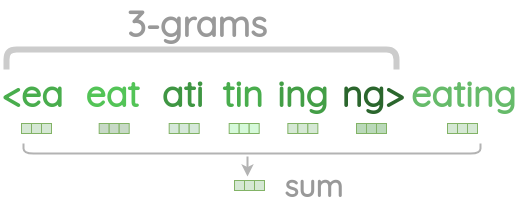

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

sample_corpus = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

our_fasttext_model = FastText(sample_corpus, vector_size = 100, min_count = 1, window = 5, sg = 1)

In [ ]:
print("Most Similar words of word 'human' : ")
our_fasttext_model.wv.most_similar('human')

In [7]:
# 이번에는 sample_corpus 대신에 'twitter-airline-sentiment.csv'를 tfidf를 이용해 실행해보아라.
# HW2의 preprocess 함수를 이용하면 된다.

"""
write your code here

# define training data
sample_corpus = []

# train fasttext model
our_fasttext_model = FastText(sample_corpus, vector_size = 100, min_count = 1, window = 5, sg = 1)
"""

# write your code here

from gensim.models import FastText
from gensim.test.utils import common_texts

# define training data
sample_corpus = preprocess_token

# train fasttext model
our_fasttext_model = FastText(sample_corpus, vector_size = 100, min_count = 1, window = 5, sg = 1)

In [8]:
print("Most Similar words of word 'human' : ")
our_fasttext_model.wv.most_similar('human')

Most Similar words of word 'human' : 


[('talktoahuman', 0.9974089860916138),
 ('peak', 0.9955347180366516),
 ('1person', 0.9936808347702026),
 ('inperson', 0.9931089878082275),
 ('inhuman', 0.9925746321678162),
 ('loudspeak', 0.9924426078796387),
 ('imperson', 0.990892767906189),
 ('spoke', 0.9906590580940247),
 ('spoken', 0.9904417395591736),
 ('person', 0.9899728894233704)]

## 4. 임베딩 시각화

지금까지 우리는 텍스트를 나타내는 다양한 벡터화 기법을 살펴보았습니다. 얻은 벡터는 NLP 작업의 특징으로 사용됩니다. 모든 ML 프로젝트의 중요한 측면은 기능 탐색입니다. 시각적 탐색은 모든 데이터 관련 문제에 대한 매우 중요한 측면입니다. 임베딩은 저차원 벡터이지만, 100개 또는 300개의 차원은 시각화하기에 너무 높습니다.

t-SNE 또는 t-분포 확률 이웃 임베딩은 이 문제를 해결하는 데 도움이됩니다. 임베딩과 같은 고차원 데이터를 2D 또는 3D 데이터로 축소하여 시각화하는 기술입니다. 이 기술은 임베딩 (또는 모든 데이터)을 취하고 입력 데이터를 더 적은 차원으로 나타내는 방법을 살펴봅니다. 이를 통해 원래 고차원 입력 공간과 저차원 출력 공간에서 동일한 데이터 분포를 유지하면서 입력 데이터를 가장 잘 표현하는 방법을 찾을 수 있습니다. 이러한 기술은 우리가 입력 데이터를 플롯하고 시각화할 수 있게 해줍니다. 단어 임베딩 공간을 감지하는 데 도움이 됩니다.

이제 서로 다른 임베딩 스키마의 어휘에서 가장 유사한 단어의 산점도를 플롯해 봅시다.


### 1. 아래의 keys의 단어들을 위에서 활용한 word2vec 모델 중 한가지 모델을 로드하고, 각 단어와 가장 비슷한 단어 30개와 그에 상응하는 벡터를 뽑는다. 총 16x30개의 단어와 벡터 생성.

예시) 

India -> 'Indias', 'Indiaâ_€_™', 'Pakistan'...

good -> 'great', 'bad','terrific'...

### 2. 생성된 단어와 벡터들을 TSNE를 통해, 플로팅을 위해 2차원 값 (X,y)으로 축소하고 저장한다.

### 3. matplotlib을 이용해 최종 출력

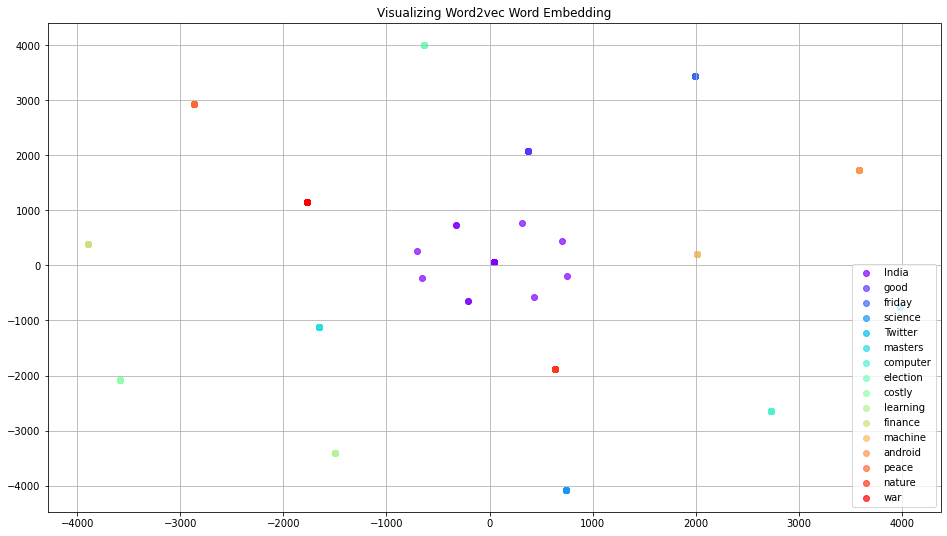

In [9]:
# Visualizing Word2vec Word Embedding 

keys = ['India', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war']

words_clusters = []
embeddings_clusters = []


# 1. 아래의 keys의 단어들을 위에서 활용한 word2vec 모델 중 한가지 모델을 로드하고, 각 단어와 가장 비슷한 단어 30개와 그에 상응하는 벡터를 뽑는다. 총 16x30개의 단어와 벡터 생성.
# 힌트: 불러온 모델의 Word2VecModel.most_similar(word, topn = 30) 함수 사용.

"""
write your code here
"""
# new_model = Word2Vec.load('model.bin')

for k in keys :
    word_to_clusters = [i[0] for i in our_fasttext_model.wv.most_similar(k,topn = 30)]
    embeddings_to_clusters = [our_fasttext_model.wv[j] for j in word_to_clusters]
    words_clusters.append(word_to_clusters)
    embeddings_clusters.append(embeddings_to_clusters)

In [10]:
print(np.shape(words_clusters))
print(np.shape(embeddings_clusters))

(16, 30)
(16, 30, 100)


In [11]:
embeddings_clusters=np.array(embeddings_clusters).reshape(16*30,100)

In [30]:
from sklearn.manifold import TSNE

# 2. 생성된 단어와 벡터들을 TSNE를 통해, 플로팅을 위해 2차원 값 (X,y)으로 축소하고 저장한다.

"""
write your code here
"""
tsne = TSNE(n_components=2, random_state=0, n_iter=100000)
clusters_list=tsne.fit_transform(embeddings_clusters)

C:\Users\hun98\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\hun98\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [31]:
np.shape(clusters_list)

(480, 2)

In [32]:
# # 3. matplotlib을 이용해 최종 출력

import matplotlib.pyplot as plt 
# import matplotlib.cm as cm
# %matplotlib inline

# def plot_most_similar_words(embedding_cluster, word_cluster):
# """
# write your code here
# """
  

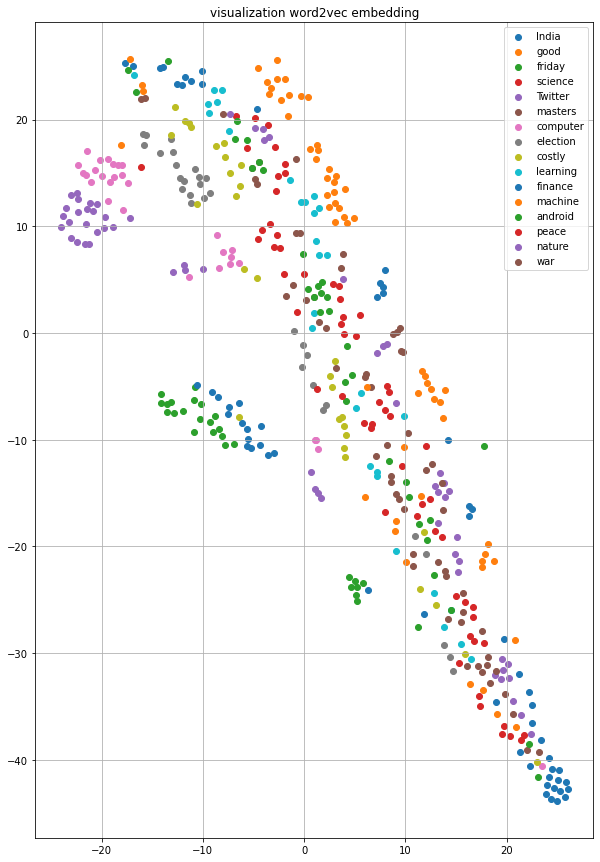

In [33]:
# viridis 색상 맵 객체 생성

# group_labels = np.repeat(range(16), 30)

# # Define the color map for the groups
# color_map = plt.cm.get_cmap('hsv', 16)

plt.figure(figsize=(10,15))
plt.title("visualization word2vec embedding")

# Plot the 2D scatter plot with different colors for each group of 30 words
for i in range(0,16):
    plt.scatter(clusters_list[30*i:30*(i+1),0], clusters_list[30*i:30*(i+1),1], label=keys[i])

plt.legend(fontsize =10)
plt.grid()
plt.show()